In [48]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import networkx as nx
import numpy as np

# Get degree from TigerGraph log file

In [ ]:
in_file = './degrees.log'
in_file = 'europe-osm-degrees.log'
degree_list = []
with open(in_file) as in_fh:
    for line in in_fh:
        degree = int(line)
        degree_list.append(degree)

# Create graph from mtx

In [ ]:
mtx_file = 'as-Skitter-wt.mtx'
edges = []
line_cnt = 0
with open(mtx_file, 'r') as fp:
    for line in fp:
        line_cnt += 1
        if line_cnt % 1000000 == 0:
            print('at', line_cnt)
        #print(line)
        edge_in = line.split()
        if edge_in[0] == '*Vertices' or edge_in[0] == '*Edges':
            continue
        else:
            edges.append((int(edge_in[0]), int(edge_in[1])))

# Read edge list from graph500 output

In [83]:
g500_edge_file = 'g500-edges'
scale = 20
vertex_cnt = 2 ** scale
degree_list = [0] * vertex_cnt

# read edgelist file
f = open(g500_edge_file, "r")
edges_in = np.fromfile(f, dtype=np.uint64)

# undirected graph
for i in range(0, len(edges_in), 2):
    degree_list[edges_in[i]] += 1
    degree_list[edges_in[i+1]] += 1

# Create graph from edges

In [71]:
graph = nx.Graph()
graph.add_edges_from(edges)
degree_list = [val for (node, val) in graph.degree()]

# Collect stats

In [84]:
print('Max degree=', max(degree_list))
print('Min degree=', min(degree_list))
print('Avg degree=', sum(degree_list)/len(degree_list))

Max degree= 138496
Min degree= 0
Avg degree= 32.0


In [85]:
hist_dict = {}

for d in degree_list:
    if d in hist_dict:
        hist_dict[d] += 1
    else:
        hist_dict[d] = 1
        
#print(hist_dict)

In [96]:
hist_dict[2]

75696

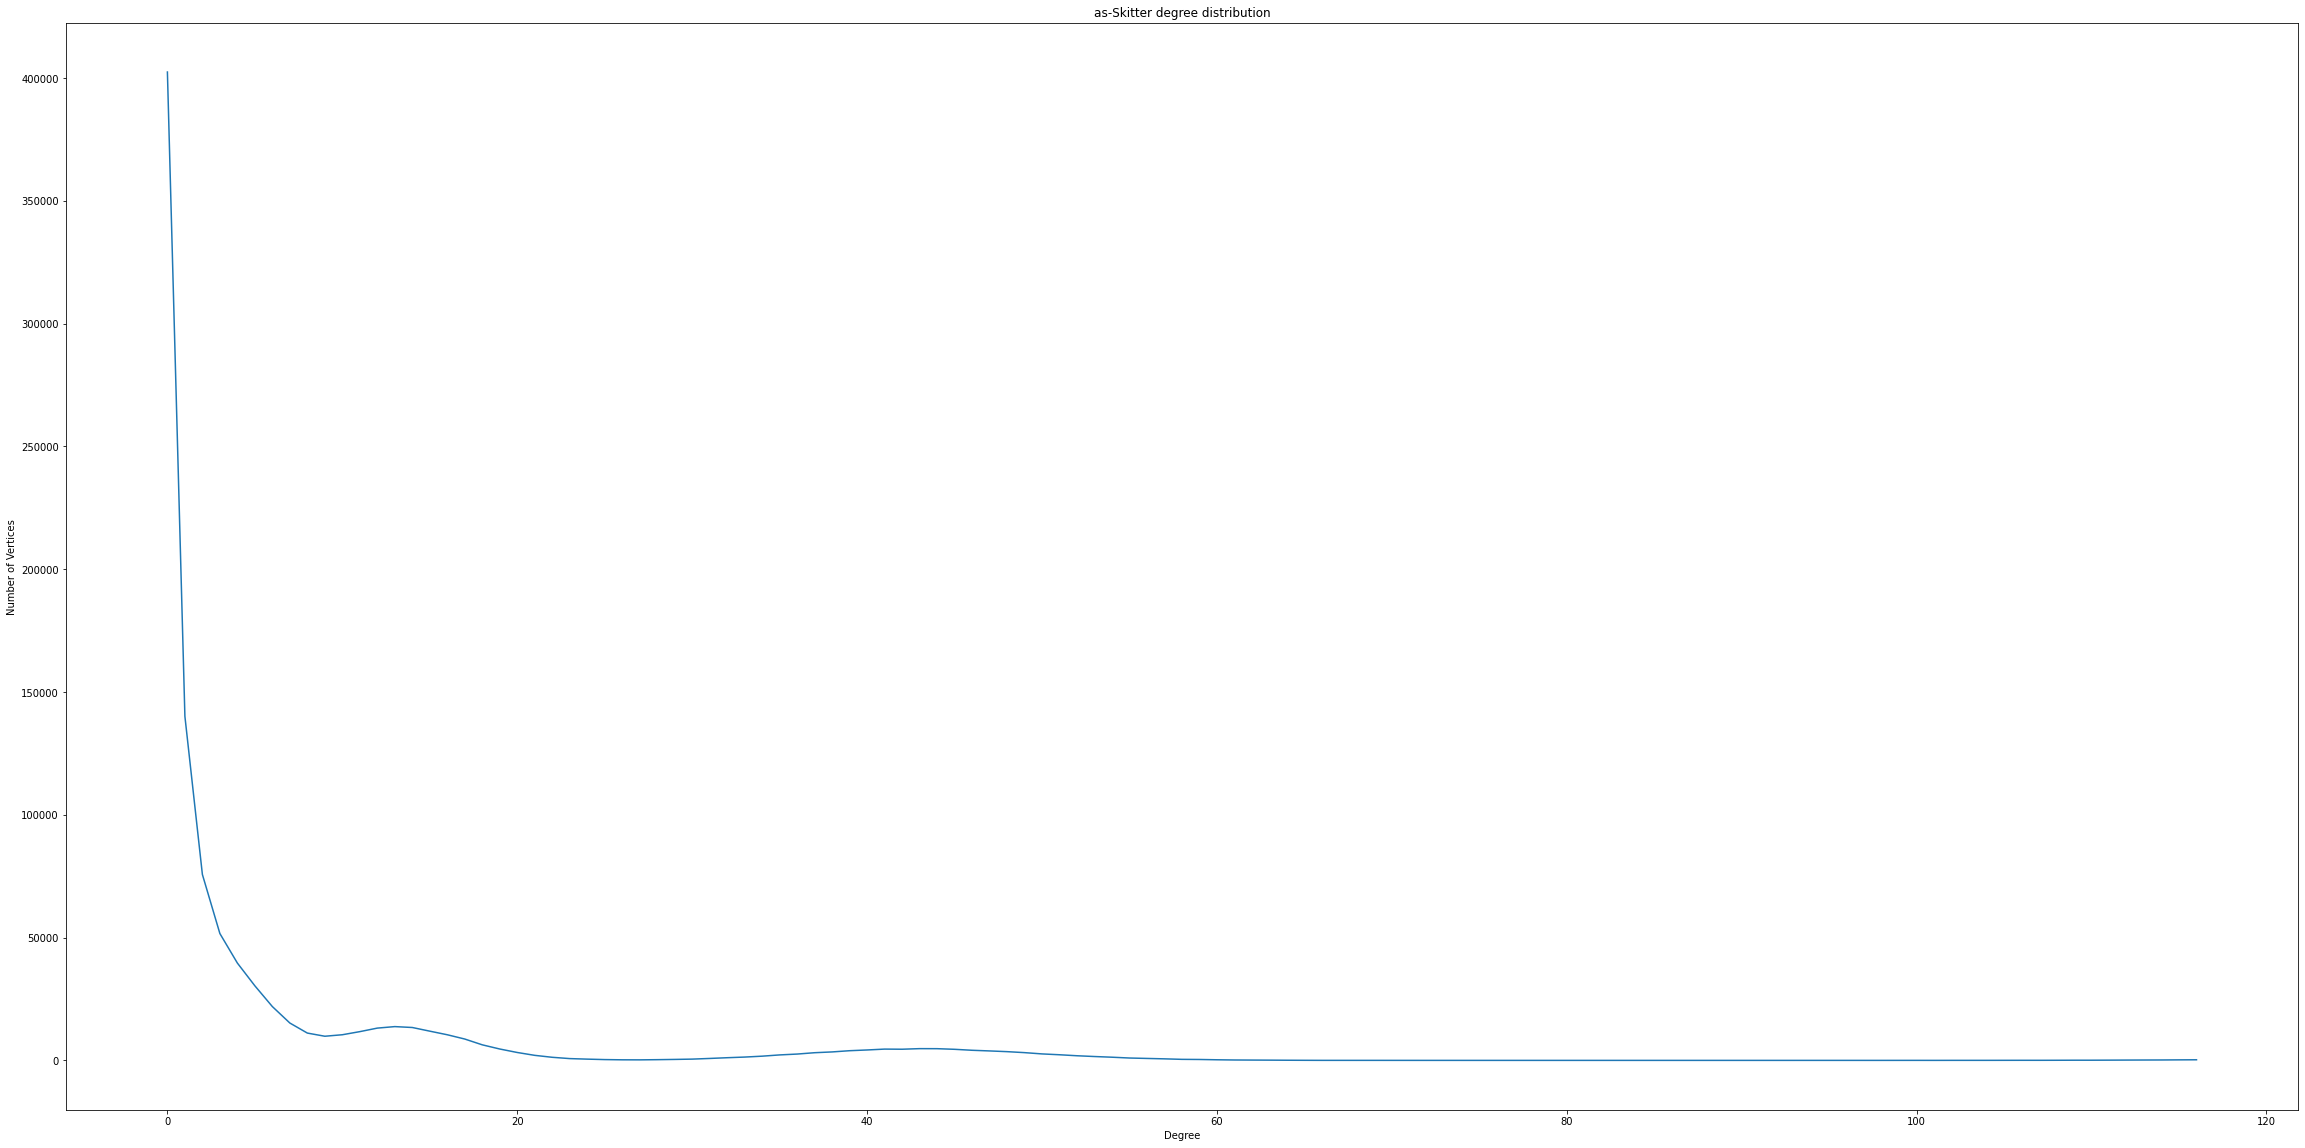

In [93]:
hist = sorted(hist_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*hist) # unpack a list of pairs into two tuples


#figure(figsize=(40, 10), dpi=80)
figure(figsize=(40, 20))
plt.xlabel('Degree')
plt.ylabel('Number of Vertices')
plt.title('as-Skitter degree distribution')
plt.plot(x[0:99], y[0:99])
#plt.plot(x, y)
plt.show()

In [49]:
!ls

1000_patients	    europe-osm-degrees.log  ref-names.csv
all-last-names.csv  g500-edges		    release-cosinesim.sh
as-Skitter-wt.mtx   gen-fuzzy-data.py	    release-recomengine.sh
count-vertex.py     gen-synthea-data.sh     release.sh
debug		    gen-travelplan.py	    report-cu-util.py
degree-stats.ipynb  new-names.csv	    test.mtx
degrees.log	    randomize-graph.py	    amd-graphanalytics-install
devdeps.sh	    reduce-graph.py
